# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [18]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
from newsapi import NewsApiClient
%matplotlib inline


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\likem\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [19]:
# Read your api key environment variable
load_dotenv()
news_api_key = os.getenv("NEWS_API_KEY")

In [20]:
# Create a newsapi client

newsapi = NewsApiClient(api_key=news_api_key)

In [21]:
# Fetch the Bitcoin news articles
btc_news = newsapi.get_everything(
    q="Bitcoin",
    language="en",
    page_size=100,
    sort_by="relevancy"
)

# Show the total number of news
btc_news["totalResults"]


11089

In [22]:
# Fetch the Ethereum news articles
eth_news = newsapi.get_everything(
    q="Ethereum",
    language="en",
    page_size=100,
    sort_by="relevancy"
)

# Show the total number of news
eth_news["totalResults"]


3202

In [27]:
# Create the Bitcoin sentiment scores DataFrame
btc_news_sen = []
    
    # Loop through news headlines for each article
for article in btc_news["articles"]:
        try:
            # Assign specific features of each article
            text = article["content"]
            date = article["publishedAt"][:10]
            sentiment = analyzer.polarity_scores(text)
            compound = sentiment["compound"]
            pos = sentiment["pos"]
            neu = sentiment["neu"]
            neg = sentiment["neg"]
            
            # Append each articles sentiment scores to a list
            btc_news_sen.append({
              "text": text,
              "date": date,
              "compound": compound,
              "positive": pos,
              "negative": neg,
              "neutral": neu
            
        })
        
        except AttributeError:
            pass
    
  # Create DataFrame
btc_news_df = pd.DataFrame(btc_news_sen)

# Reorder DataFrame columns
btc_df = pd.DataFrame(btc_news_df)

cols = ["date", "compound", "positive", "negative", "neutral","text",]
btc_df = btc_df[cols]

btc_df.head()
        


,date,compound,positive,negative,neutral,text
0,2021-06-09,0.8402,0.282,0.0,0.718,El Salvador's President Nayib Bukele has made ...
1,2021-06-09,0.1280,0.043,0.0,0.957,El Salvador has become the first country in th...
2,2021-06-14,0.6908,0.169,0.0,0.831,"It's all about clean energy, it seems. \r\nElo..."
3,2021-06-09,0.2732,0.060,0.0,0.940,image captionThe move means bitcoin will be ac...
4,2021-06-11,0.5574,0.107,0.0,0.893,"Several crypto fans that descended on Miami, F..."


In [24]:
# Create the Ethereum sentiment scores DataFrame

eth_news_sen = []

 # Loop through news headlines for each article
for article in eth_news["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        eth_news_sen.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
 # Create DataFrame
eth_news_df = pd.DataFrame(eth_news_sen)

# Reorder DataFrame columns
eth_df = pd.DataFrame(eth_news_df)

cols = ["date", "compound", "positive", "negative", "neutral","text",]
eth_df = eth_df[cols]

eth_df.head()



,date,compound,positive,negative,neutral,text
0,2021-06-17,0.000,0.0,0.000,1.000,TL;DR: The Cryptocurrency with Ethereum and So...
1,2021-06-20,-0.296,0.0,0.061,0.939,It wasn't long ago that your average person ha...
2,2021-05-31,0.000,0.0,0.000,1.000,A representation of virtual currency Ethereum ...
3,2021-06-10,-0.340,0.0,0.066,0.934,This article was translated from our Spanish e...
4,2021-06-03,0.000,0.0,0.000,1.000,This new mining feature is called 'Norton Cryp...


In [28]:
# Describe the Bitcoin Sentiment
btc_df.describe()

,compound,positive,negative,neutral
count,100.000000,100.000000,100.000000,100.000000
mean,0.010983,0.044970,0.039050,0.916000
std,0.371336,0.061781,0.049466,0.072724
min,-0.778300,0.000000,0.000000,0.718000
25%,-0.273200,0.000000,0.000000,0.871000
50%,0.000000,0.000000,0.000000,0.925000
75%,0.318200,0.079750,0.077000,1.000000
max,0.840200,0.282000,0.178000,1.000000


In [29]:
# Describe the Ethereum Sentiment
eth_df.describe()

,compound,positive,negative,neutral
count,100.000000,100.000000,100.000000,100.00000
mean,0.109387,0.056870,0.028560,0.91456
std,0.381433,0.067706,0.053978,0.08040
min,-0.868900,0.000000,0.000000,0.65500
25%,0.000000,0.000000,0.000000,0.86700
50%,0.000000,0.040500,0.000000,0.92650
75%,0.369275,0.092750,0.061000,1.00000
max,0.848100,0.290000,0.286000,1.00000


### Questions:

Q: Which coin had the highest mean positive score?

A: 

Q: Which coin had the highest compound score?

A: 

Q. Which coin had the highest positive score?

A: 

In [ ]:
Q: Which coin had the highest mean positive score?

A: Ethereum has the highest mean positive score: 0.051320

Q: Which coin had the highest compound score?

A:Bitcoin has the highest compound score, Max 0.840200

Q. Which coin had the highest positive score?

A:Bitcoin has the highest positive score, Max: 0.282000

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [30]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [31]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [52]:
# Expand the default stopwords list if necessary
sw_add_ons = {'staff', 'file'}

In [53]:
# Complete the tokenizer function
import nltk
nltk.download('wordnet')

def tokenizer(text):
    """Tokenizes text."""
    # Create a list of the words
    words_tokened = word_tokenize(text)

    # Convert the words to lowercase
    words_lowered = [word.lower() for word in words_tokened]

    # Remove the punctuation
    regex = re.compile('[^a-zA-Z]')
    words_regexed = [regex.sub('', word) for word in words_lowered]
    
    # Remove the stop words
    sw = set(stopwords.words('english'))
    stopwords_removed = [word.lower() for word in words_regexed if word not in sw.union(sw_add_ons)]

    # Lemmatize Words into root words
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in stopwords_removed]

    return tokens

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\likem\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [56]:
# Create a new tokens column for Bitcoin
btc_df['tokens'] = btc_df.apply(lambda x : tokenizer(x['text']), axis=1)
btc_df.head()

,date,compound,positive,negative,neutral,text,tokens
0,2021-06-09,0.8402,0.282,0.0,0.718,El Salvador's President Nayib Bukele has made ...,"[el, salvador, president, nayib, bukele, made,..."
1,2021-06-09,0.1280,0.043,0.0,0.957,El Salvador has become the first country in th...,"[el, salvador, become, first, country, world, ..."
2,2021-06-14,0.6908,0.169,0.0,0.831,"It's all about clean energy, it seems. \r\nElo...","[clean, energy, , seems, , elon, musk, tesla, ..."
3,2021-06-09,0.2732,0.060,0.0,0.940,image captionThe move means bitcoin will be ac...,"[image, captionthe, move, mean, bitcoin, accep..."
4,2021-06-11,0.5574,0.107,0.0,0.893,"Several crypto fans that descended on Miami, F...","[several, crypto, fan, descended, miami, , flo..."


In [57]:
# Create a new tokens column for Ethereum
eth_df['tokens'] = eth_df.apply(lambda x : tokenizer(x['text']), axis=1)
eth_df.head()

,date,compound,positive,negative,neutral,text,tokens
0,2021-06-17,0.000,0.0,0.000,1.000,TL;DR: The Cryptocurrency with Ethereum and So...,"[tl, , dr, , cryptocurrency, ethereum, solidit..."
1,2021-06-20,-0.296,0.0,0.061,0.939,It wasn't long ago that your average person ha...,"[nt, long, ago, average, person, clue, nft, , ..."
2,2021-05-31,0.000,0.0,0.000,1.000,A representation of virtual currency Ethereum ...,"[representation, virtual, currency, ethereum, ..."
3,2021-06-10,-0.340,0.0,0.066,0.934,This article was translated from our Spanish e...,"[article, translated, spanish, edition, using,..."
4,2021-06-03,0.000,0.0,0.000,1.000,This new mining feature is called 'Norton Cryp...,"[new, mining, feature, called, norton, crypto,..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [65]:
from collections import Counter
from nltk import ngrams
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re
import pandas as pd
lemmatizer = WordNetLemmatizer()

In [66]:
# Generate the Bitcoin N-grams where N=2
def bigram_counter(tokens, N):
    words_count = dict(Counter(ngrams(tokens, n=N)))
    return words_count

bigram_btc = bigram_counter(btc_df, 2)
bigram_btc

{('date', 'compound'): 1,
 ('compound', 'positive'): 1,
 ('positive', 'negative'): 1,
 ('negative', 'neutral'): 1,
 ('neutral', 'text'): 1,
 ('text', 'tokens'): 1}

In [67]:
# Generate the Ethereum N-grams where N=2
bigram_eth = bigram_counter(eth_df, 2)
bigram_eth

{('date', 'compound'): 1,
 ('compound', 'positive'): 1,
 ('positive', 'negative'): 1,
 ('negative', 'neutral'): 1,
 ('neutral', 'text'): 1,
 ('text', 'tokens'): 1}

In [69]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [70]:
# Use token_count to get the top 10 words for Bitcoin
token_count(btc_df, 10)

[('date', 1),
 ('compound', 1),
 ('positive', 1),
 ('negative', 1),
 ('neutral', 1),
 ('text', 1),
 ('tokens', 1)]

In [71]:
# Use token_count to get the top 10 words for Ethereum
token_count(eth_df, 10)

[('date', 1),
 ('compound', 1),
 ('positive', 1),
 ('negative', 1),
 ('neutral', 1),
 ('text', 1),
 ('tokens', 1)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [73]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]


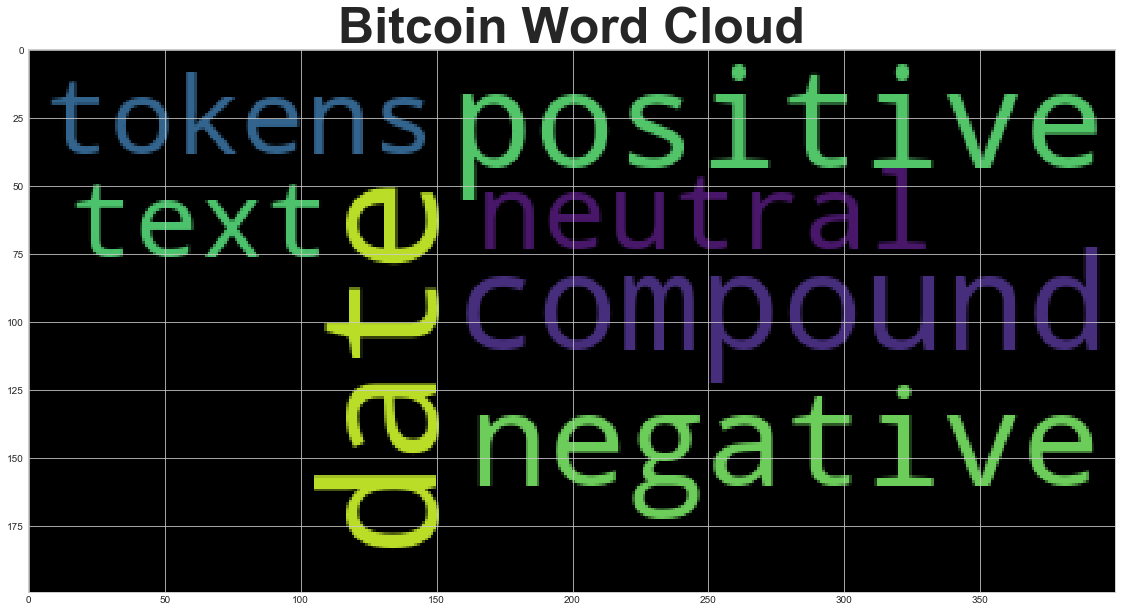

In [77]:
# Generate the Bitcoin word cloud
wc = WordCloud().generate(' '.join(btc_df))
plt.title("Bitcoin Word Cloud", fontsize = 50, fontweight = 'bold')
plt.imshow(wc)

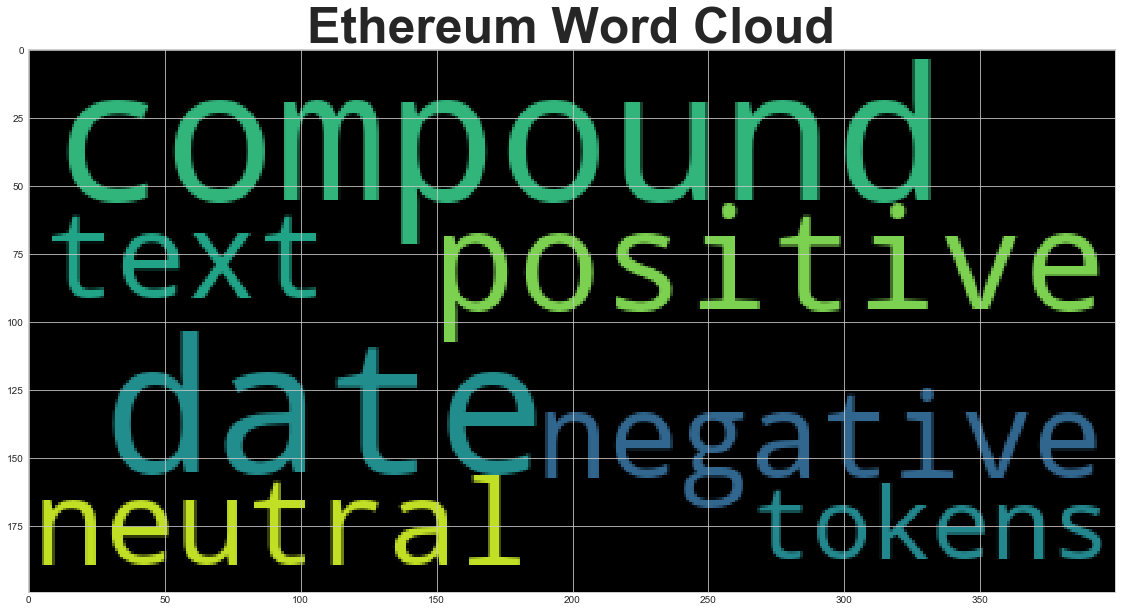

In [78]:
# Generate the Ethereum word cloud
wc = WordCloud().generate(' '.join(eth_df))
plt.title("Ethereum Word Cloud", fontsize = 50, fontweight = 'bold')
plt.imshow(wc)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [91]:
import spacy
from spacy import displacy

In [92]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

In [93]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [94]:
# Concatenate all of the Bitcoin text together
concat_btc = btc_df['text'].str.cat(sep=', ')

In [95]:
# Run the NER processor on all of the text
ner = nlp(concat_btc)

# Add a title to the document
ner.user_data["title"] = "BTC NER"


In [96]:
# Render the visualization
displacy.render(ner, style='ent')

In [99]:
# List all Entities
from pprint import pprint
pprint([(X.text, X.label_) for X in ner.ents])

[("El Salvador's", 'GPE'),
 ('Nayib Bukele', 'PERSON'),
 ('Central American', 'NORP'),
 ('El Salvador', 'GPE'),
 ('first', 'ORDINAL'),
 ('Nayib Bukele', 'PERSON'),
 ('Wednesday', 'DATE'),
 ('Citizens', 'ORG'),
 ('Elon Musk', 'PERSON'),
 ('Tesla', 'PERSON'),
 ('the past few months', 'DATE'),
 ('first', 'ORDINAL'),
 ('Tesla', 'ORG'),
 ('$1.5 billion', 'MONEY'),
 ('US', 'GPE'),
 ('El Salvador', 'GPE'),
 ('first', 'ORDINAL'),
 ('Bitcoin', 'PERSON'),
 ('Miami', 'GPE'),
 ('Florida', 'GPE'),
 ('last weekend', 'DATE'),
 ('covid-19', 'PERSON'),
 ('Larry Cermak', 'PERSON'),
 ('Last week', 'DATE'),
 ('Disney', 'ORG'),
 ('This week', 'DATE'),
 ('Tec', 'PERSON'),
 ('PayPals', 'ORG'),
 ('Wednesday', 'DATE'),
 ('Jose Fernandez da Pontethe', 'PERSON'),
 ('Mary-Ann RussonBusiness', 'PERSON'),
 ('BBC News', 'ORG'),
 ('US', 'GPE'),
 ('Donald Trump', 'PERSON'),
 ('Fox Business', 'ORG'),
 ('Bitcoin', 'PERSON'),
 ('US', 'GPE'),
 ('Photo', 'PERSON'),
 ('Michele Doying', 'PERSON'),
 ('Verge', 'ORG'),
 ('Iran'

---

### Ethereum NER

In [100]:
# Concatenate all of the Ethereum text together
concat_eth = eth_df['text'].str.cat(sep=', ')

In [101]:
# Run the NER processor on all of the text
ner_eth = nlp(concat_eth)

# Add a title to the document
ner_eth.user_data["title"] = "ETH NER"

In [103]:
# Render the visualization
displacy.render(ner_eth, style='ent')

In [104]:
# List all Entities
from pprint import pprint
pprint([(X.text, X.label_) for X in ner_eth.ents])

[("El Salvador's", 'GPE'),
 ('Nayib Bukele', 'PERSON'),
 ('Central American', 'NORP'),
 ('El Salvador', 'GPE'),
 ('first', 'ORDINAL'),
 ('Nayib Bukele', 'PERSON'),
 ('Wednesday', 'DATE'),
 ('Citizens', 'ORG'),
 ('Elon Musk', 'PERSON'),
 ('Tesla', 'PERSON'),
 ('the past few months', 'DATE'),
 ('first', 'ORDINAL'),
 ('Tesla', 'ORG'),
 ('$1.5 billion', 'MONEY'),
 ('US', 'GPE'),
 ('El Salvador', 'GPE'),
 ('first', 'ORDINAL'),
 ('Bitcoin', 'PERSON'),
 ('Miami', 'GPE'),
 ('Florida', 'GPE'),
 ('last weekend', 'DATE'),
 ('covid-19', 'PERSON'),
 ('Larry Cermak', 'PERSON'),
 ('Last week', 'DATE'),
 ('Disney', 'ORG'),
 ('This week', 'DATE'),
 ('Tec', 'PERSON'),
 ('PayPals', 'ORG'),
 ('Wednesday', 'DATE'),
 ('Jose Fernandez da Pontethe', 'PERSON'),
 ('Mary-Ann RussonBusiness', 'PERSON'),
 ('BBC News', 'ORG'),
 ('US', 'GPE'),
 ('Donald Trump', 'PERSON'),
 ('Fox Business', 'ORG'),
 ('Bitcoin', 'PERSON'),
 ('US', 'GPE'),
 ('Photo', 'PERSON'),
 ('Michele Doying', 'PERSON'),
 ('Verge', 'ORG'),
 ('Iran'

---